In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

Importing and Exploring the data

In [2]:
data = pd.read_excel('heart_failure_prediction.csv.xlsx')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(943, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [7]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
938,45,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1.0
939,68,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1.0
940,57,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1.0
941,57,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1.0
942,38,M,NAP,138.0,175.0,0.0,Normal,173.0,N,0.0,Up,0.0


In [8]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [9]:
#pd.set_option('display.max_row', 300)
data.isna().sum()

Age                0
Sex               22
ChestPainType     23
RestingBP         23
Cholesterol       22
FastingBS         23
RestingECG        22
MaxHR             23
ExerciseAngina    22
Oldpeak           23
ST_Slope          23
HeartDisease      23
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
data.shape

(920, 12)

In [13]:
data.duplicated().sum()

24

In [14]:
data=data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(896, 12)

In [17]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,53.472098,132.354911,197.723214,0.233259,136.668527,0.883259,0.555804
std,9.419064,18.622721,109.535257,0.423142,25.492568,1.066383,0.497154
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,265.250000,0.000000,155.250000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [22]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


C:\Users\Suraj Dass\AppData\Local\Temp\ipykernel_19424\2162621568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot = True)


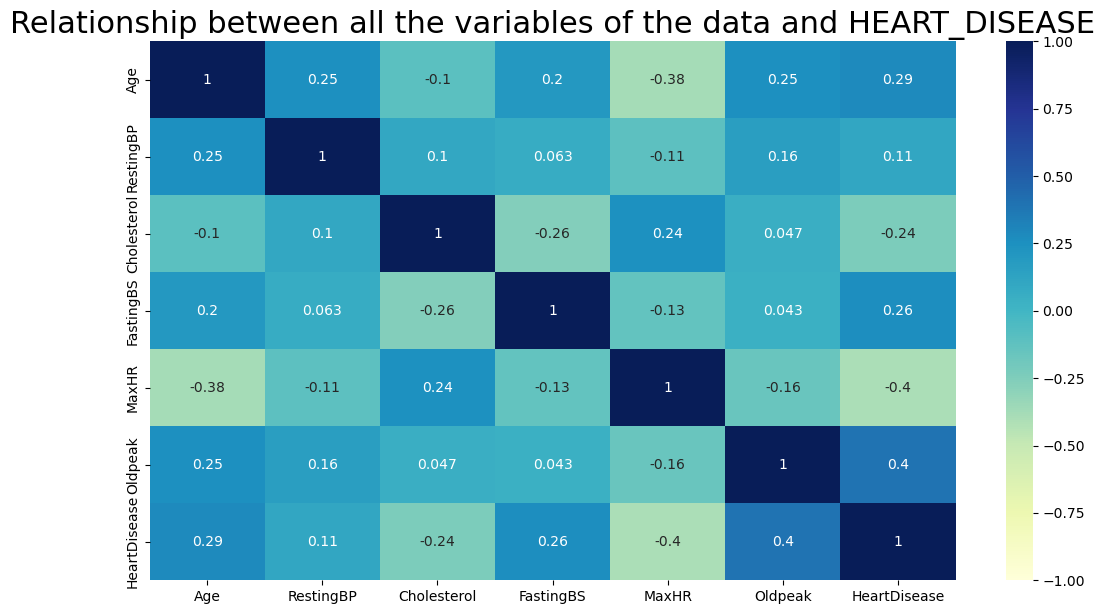

In [18]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot = True)
plt.title("Relationship between all the variables of the data and HeartDisease", fontsize = 22)
plt.show()

In [19]:
data.corr()

C:\Users\Suraj Dass\AppData\Local\Temp\ipykernel_19424\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.253721,-0.104404,0.198292,-0.379922,0.252610,0.285107
RestingBP,0.253721,1.000000,0.100117,0.063214,-0.110827,0.163158,0.106352
Cholesterol,-0.104404,0.100117,1.000000,-0.260524,0.244391,0.047128,-0.235713
FastingBS,0.198292,0.063214,-0.260524,1.000000,-0.133486,0.042835,0.264699
MaxHR,-0.379922,-0.110827,0.244391,-0.133486,1.000000,-0.157477,-0.401916
Oldpeak,0.252610,0.163158,0.047128,0.042835,-0.157477,1.000000,0.396925
HeartDisease,0.285107,0.106352,-0.235713,0.264699,-0.401916,0.396925,1.000000


C:\Users\Suraj Dass\AppData\Local\Temp\ipykernel_19424\2393552981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['HeartDisease'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

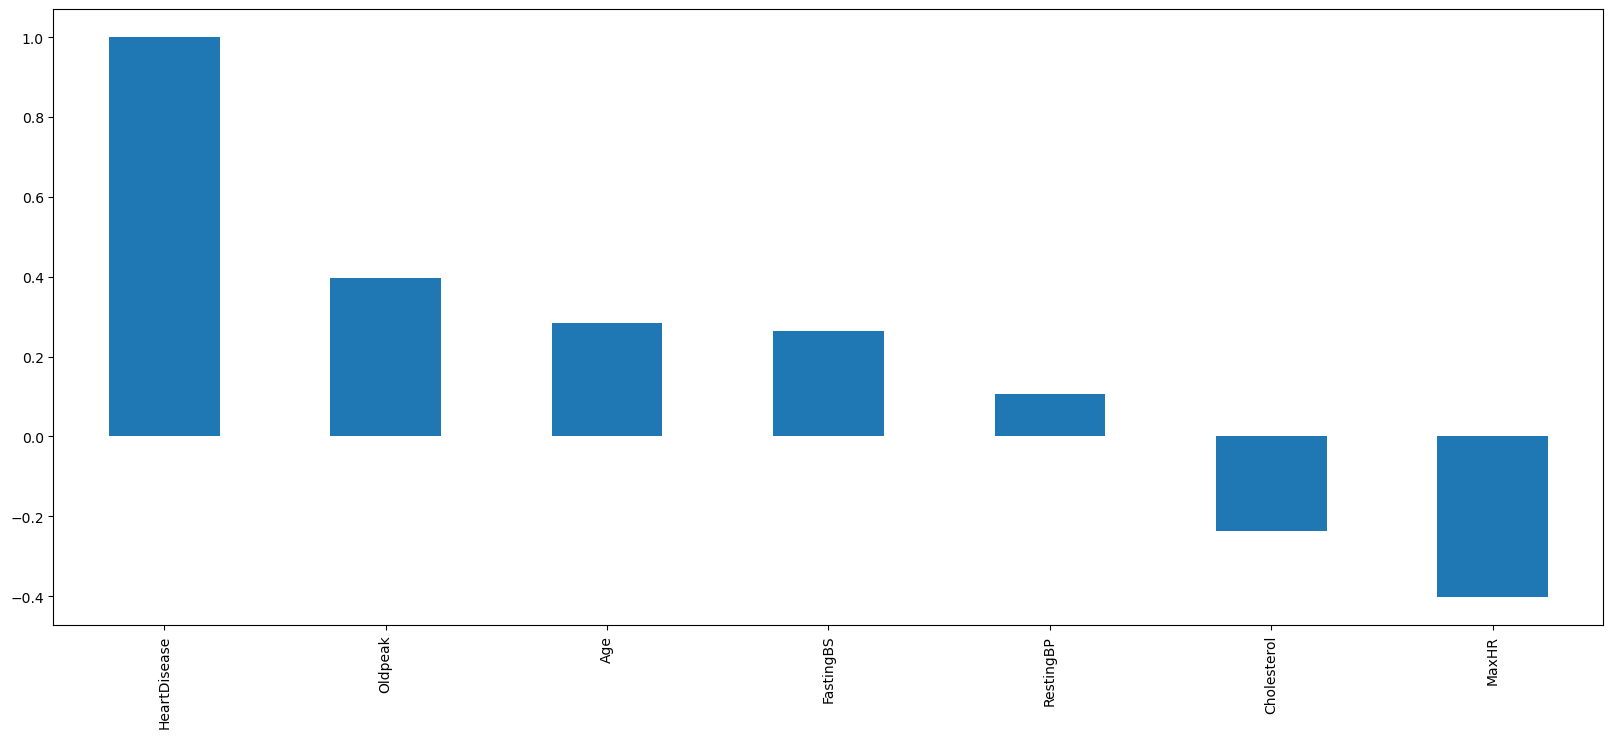

In [20]:
plt.figure(figsize=(20,8))
data.corr()['HeartDisease'].sort_values(ascending = False).plot(kind='bar')

# DATA VISUALIZATION :

In [23]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


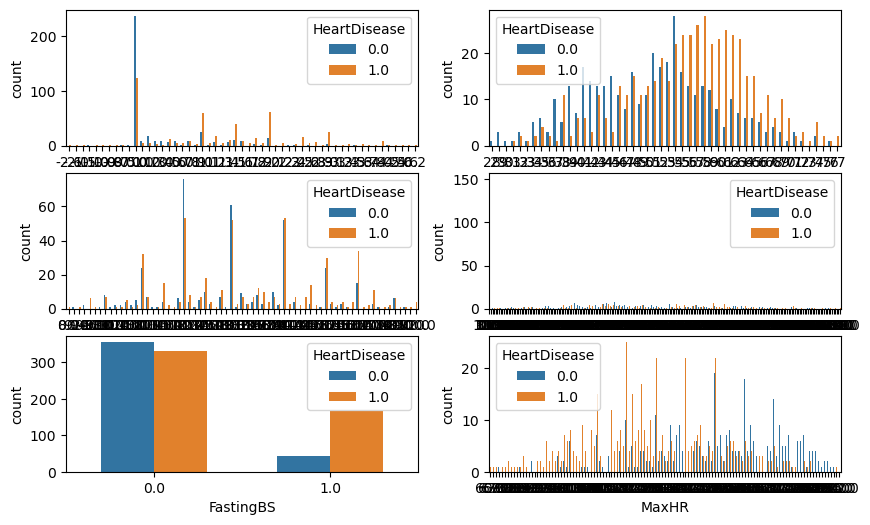

In [28]:
plt.figure(figsize=((10,6)))
plt.subplot(3,2,1)
sns.countplot(data=data, width = 0.6, x='Oldpeak', hue='HeartDisease')
plt.subplot(3,2,2)
sns.countplot(data=data, width = 0.6, x='Age', hue='HeartDisease')
plt.subplot(3,2,3)
sns.countplot(data=data, width = 0.6, x='RestingBP', hue='HeartDisease')
plt.subplot(3,2,4)
sns.countplot(data=data, width = 0.6, x='Cholesterol', hue='HeartDisease')
plt.subplot(3,2,5)
sns.countplot(data=data, width = 0.6, x='FastingBS', hue='HeartDisease')
plt.subplot(3,2,6)
sns.countplot(data=data, width = 0.6, x='MaxHR', hue='HeartDisease')
plt.show()

## We can see data set have object values , so we have to change them to numerical data so our model can interpret them.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
dummydata = pd.get_dummies(data)

In [33]:
dummydata.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0.0,172.0,0.0,0.0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0.0,156.0,1.0,1.0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0.0,98.0,0.0,0.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0.0,108.0,1.5,1.0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0.0,122.0,0.0,0.0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


## Model Building

In [37]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [38]:
Y = dummydata['HeartDisease']
X = dummydata.drop('HeartDisease',axis=1)

### As we can see that data is unbalanced, So we have to balance is first.


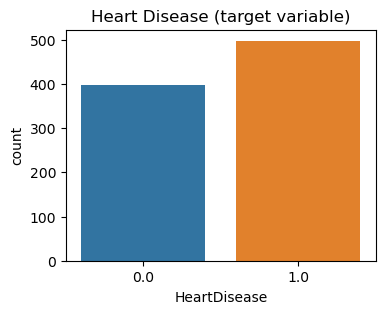

In [34]:
plt.figure(figsize=(4,3))
sns.countplot(x=dummydata.HeartDisease)
plt.title('Heart Disease (target variable)')
plt.show()

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
resamp=RandomOverSampler()

In [39]:
bx, by = resamp.fit_resample(X,Y)

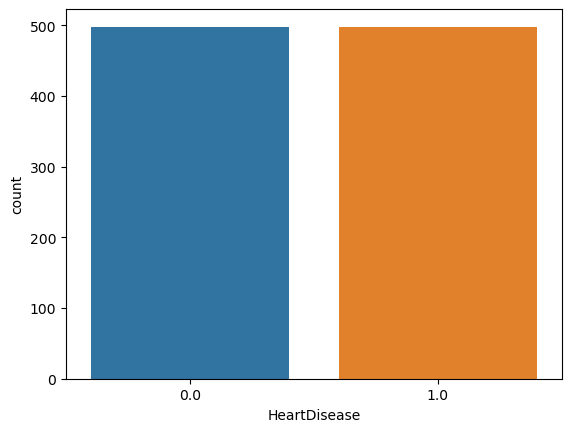

In [40]:
sns.countplot(x=by)
plt.show()

#### Now our data is Balanced

### Spliting training data and test data in 80:20 ratio

In [41]:
bx_train,bx_test,by_train,by_test=train_test_split(bx, by,test_size=0.2, random_state = 42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Logistic Regression

In [45]:
LR = LogisticRegression()

In [46]:
LR.fit(bx_train,by_train) #training the model

C:\Users\Suraj Dass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
LR_prediction = LR.predict(bx_test)
LR_accuracy = accuracy_score(by_test, LR_prediction)

In [48]:
print('Logistic Regression Accuracy: ', LR_accuracy)

Logistic Regression Accuracy:  0.895


In [49]:
print(classification_report(by_test,LR_prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        89
         1.0       0.89      0.93      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



## Decession Tree

In [50]:
DCT = DecisionTreeClassifier()

In [51]:
DCT.fit(bx_train, by_train)  #training the model

DecisionTreeClassifier()

In [52]:
DCT_prediction = DCT.predict(bx_test)
DCT_accuracy = accuracy_score(by_test, DCT_prediction)

In [53]:
print('Decision Tree Accuracy: ', DCT_accuracy)

Decision Tree Accuracy:  0.8


In [55]:
print(classification_report(by_test,DCT_prediction))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        89
         1.0       0.83      0.80      0.82       111

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



## Random Forest

In [56]:
RFC= RandomForestClassifier(n_estimators=200)

In [57]:
RFC.fit(bx_train, by_train)  #training the model

RandomForestClassifier(n_estimators=200)

In [59]:
RFC_prediction = RFC.predict(bx_test)
RFC_accuracy = accuracy_score(by_test, RFC_prediction)

In [60]:
print('Random Forest Accuracy:', RFC_accuracy)

Random Forest Accuracy:  0.91


In [61]:
print(classification_report(by_test,RFC_prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        89
         1.0       0.91      0.93      0.92       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



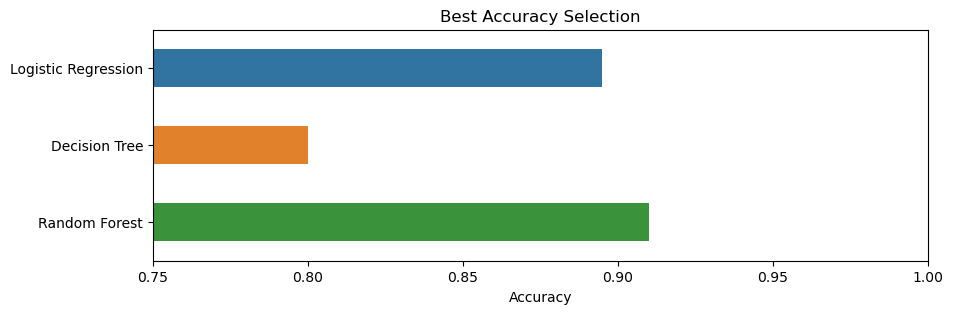

In [63]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [LR_accuracy, DCT_accuracy, RFC_accuracy]

plt.figure(figsize=(10, 3))
sns.barplot(x=accuracies, y=classifiers, width=0.5, orient='h')  # Set orient to 'h' for horizontal
plt.title('Best Accuracy Selection')
plt.xlabel('Accuracy')
plt.xlim(0.75, 1)  # Set x-axis limits for accuracy values
plt.show()

#### We can see that out of the three the highest accuracy we are getting from Random Forest, So our Final model would be Random Forest of Heart disease Prediction with 91% Accuracy.